In [1]:
!pip install beautifulsoup4 requests

In [2]:
!pip install mplfinance

In [3]:
!apt-get update -qq
!apt-get install fonts-noto-cjk -qq

'apt-get' ���O�����Υ~���R�O�B�i���檺�{���Χ妸�ɡC
'apt-get' ���O�����Υ~���R�O�B�i���檺�{���Χ妸�ɡC


In [4]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
import matplotlib.font_manager as fm
import matplotlib


# **TWSE API抓取**

In [5]:
# 將民國年轉換為西元年
def convert_to_ad(date_str):
    # 將民國年轉換為西元年
    parts = date_str.split('/')
    parts[0] = str(int(parts[0]) + 1911)  # 民國轉西元 (例如 112 + 1911 = 2023)
    return '/'.join(parts)

In [6]:
# 定義函數來抓取指定月份的股票數據
def fetch_stock_data(date, stock_no):
    url = f"https://www.twse.com.tw/exchangeReport/STOCK_DAY?response=json&date={date}&stockNo={stock_no}"
    response = requests.get(url)
    data = response.json()
    return pd.DataFrame(data['data'], columns=data['fields'])

In [7]:
def fetch_multiple_months(stock_id, start_year, start_month, end_year, end_month):
    all_data = []

    # 從起始年月到結束年月逐月抓取
    year,month = start_year, start_month

    while (year < end_year) or (year == end_year and month <= end_month):
        # 格式化日期
        date = f"{year}{str(month).zfill(2)}01"
        print(f"Fetching data for {year}-{str(month).zfill(2)}")
        # 抓取當前月份的數據
        df = fetch_stock_data(date, stock_id)

        # 將數據添加到列表中
        if df is not None:
            all_data.append(df)

        # 移動到下一個月
        month += 1
        if month > 12:
            month = 1
            year += 1

    # 將每月資料合併成一個 DataFrame
    if all_data:
        return pd.concat(all_data, ignore_index=True)
    else:
        return pd.DataFrame()

df = fetch_multiple_months('6214', 2020, 1, 2024, 9)
print(df)

Fetching data for 2020-01
Fetching data for 2020-02
Fetching data for 2020-03
Fetching data for 2020-04
Fetching data for 2020-05
Fetching data for 2020-06
Fetching data for 2020-07
Fetching data for 2020-08
Fetching data for 2020-09
Fetching data for 2020-10
Fetching data for 2020-11
Fetching data for 2020-12
Fetching data for 2021-01
Fetching data for 2021-02
Fetching data for 2021-03
Fetching data for 2021-04
Fetching data for 2021-05
Fetching data for 2021-06
Fetching data for 2021-07
Fetching data for 2021-08
Fetching data for 2021-09
Fetching data for 2021-10
Fetching data for 2021-11
Fetching data for 2021-12
Fetching data for 2022-01
Fetching data for 2022-02
Fetching data for 2022-03
Fetching data for 2022-04
Fetching data for 2022-05
Fetching data for 2022-06
Fetching data for 2022-07
Fetching data for 2022-08
Fetching data for 2022-09
Fetching data for 2022-10
Fetching data for 2022-11
Fetching data for 2022-12
Fetching data for 2023-01
Fetching data for 2023-02
Fetching dat

In [8]:
# 資料處理，將日期轉換為正確格式
df['日期'] = df['日期'].apply(convert_to_ad)
df['日期'] = pd.to_datetime(df['日期'], format='%Y/%m/%d')
df.iloc[:, 1:] = df.iloc[:, 1:].apply(lambda x: pd.to_numeric(x.str.replace(',', ''), errors='coerce'))

# 重新命名欄位
df.rename(columns={
    '日期': 'Date',
    '開盤價': 'Open',
    '最高價': 'High',
    '最低價': 'Low',
    '收盤價': 'Close',
    '成交股數': 'Volume'
}, inplace=True)

print(df)

           Date  Volume      成交金額   Open   High    Low  Close  漲跌價差  成交筆數
0    2020-01-02  196298  14836061   75.8   75.8   75.4   75.4  -0.1   164
1    2020-01-03  238643  17979284   75.5   75.8   75.1   75.2  -0.2   197
2    2020-01-06  390674  29199308   75.0   75.1   74.5   74.5  -0.7   297
3    2020-01-07  328176  24410088   74.6   74.8   74.0   74.5   0.0   284
4    2020-01-08  381909  28288643   74.2   74.5   73.8   74.3  -0.2   292
...         ...     ...       ...    ...    ...    ...    ...   ...   ...
1149 2024-09-24  439562  56211736  130.0  130.0  127.0  127.0  -3.0   515
1150 2024-09-25  363389  46479740  128.0  129.0  127.0  127.0   0.0   531
1151 2024-09-26  296012  37987580  128.5  129.5  127.5  127.5   0.5   373
1152 2024-09-27  387013  49504853  128.0  128.5  127.0  127.5   0.0   366
1153 2024-09-30  449067  57157815  127.5  128.5  126.5  127.0  -0.5   374

[1154 rows x 9 columns]


<Figure size 1000x600 with 0 Axes>

c:\Users\miche\anaconda3\envs\gpu_env\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 31934 (\N{CJK UNIFIED IDEOGRAPH-7CBE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\miche\anaconda3\envs\gpu_env\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 35488 (\N{CJK UNIFIED IDEOGRAPH-8AA0}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\miche\anaconda3\envs\gpu_env\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 27599 (\N{CJK UNIFIED IDEOGRAPH-6BCF}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\miche\anaconda3\envs\gpu_env\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 26085 (\N{CJK UNIFIED IDEOGRAPH-65E5}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\miche\anaconda3\envs\gpu_env\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 38283 (\N{CJK UNIFIED IDEOGRAPH-9

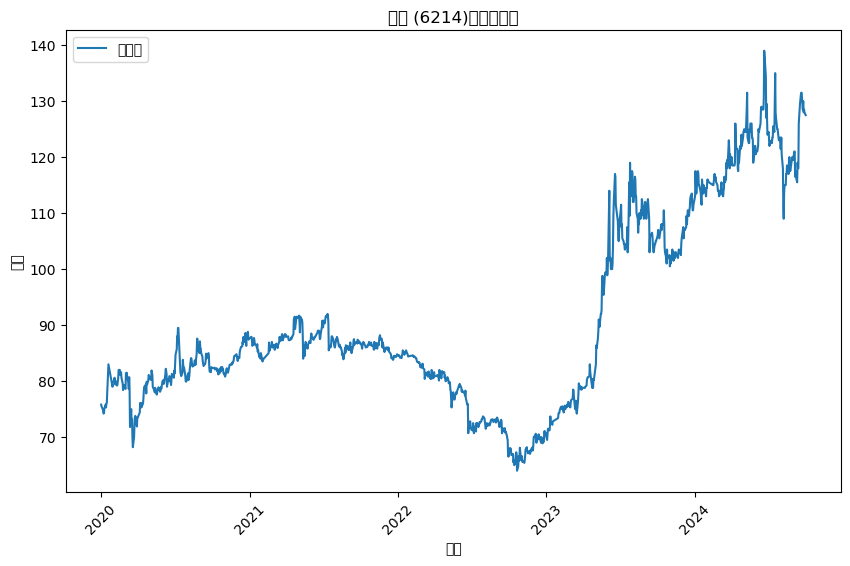

c:\Users\miche\anaconda3\envs\gpu_env\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 26368 (\N{CJK UNIFIED IDEOGRAPH-6700}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\miche\anaconda3\envs\gpu_env\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 39640 (\N{CJK UNIFIED IDEOGRAPH-9AD8}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


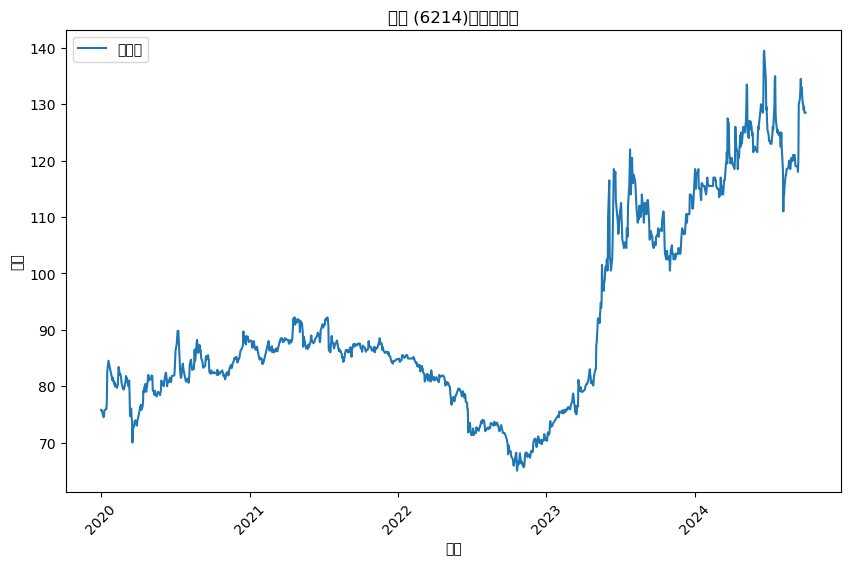

c:\Users\miche\anaconda3\envs\gpu_env\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 20302 (\N{CJK UNIFIED IDEOGRAPH-4F4E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


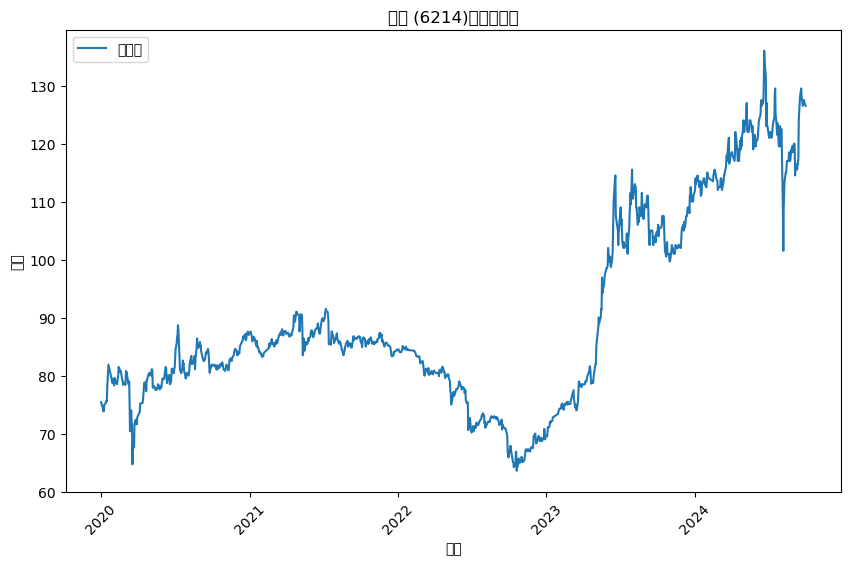

c:\Users\miche\anaconda3\envs\gpu_env\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 25910 (\N{CJK UNIFIED IDEOGRAPH-6536}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


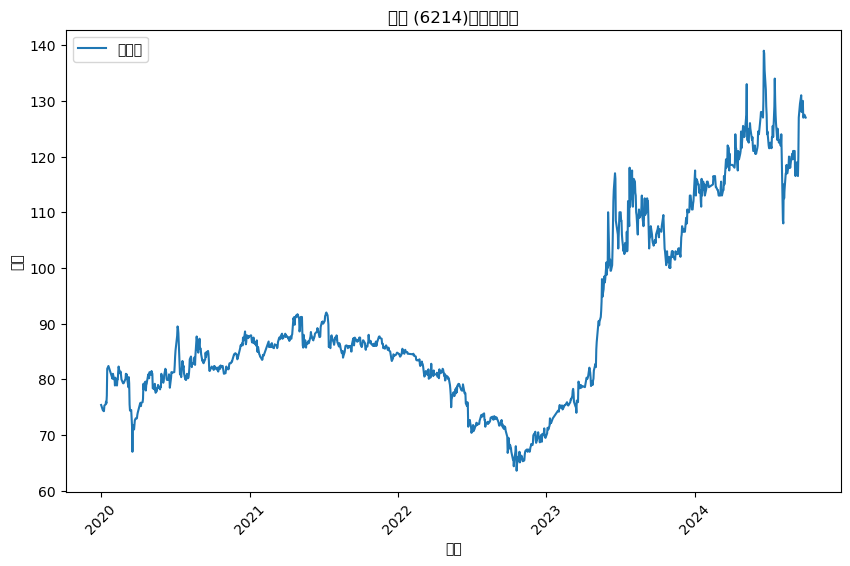

In [9]:
# 定義一個繪製函數
def plot_stock_data(df, column_name, label_name, stock_name):
  plt.figure(figsize=(10, 6))
  plt.plot(df['Date'], df[column_name], label=label_name)
  # 設定圖表標題和軸標籤
  plt.title(f'{stock_name}每日{label_name}')
  plt.xlabel('日期')
  plt.ylabel('價格')
  plt.xticks(rotation=45)
  plt.legend()
  plt.show()

# 繪製收盤價圖表
plt.figure(figsize=(10, 6))
# 使用定義的函數繪製各個欄位
plot_stock_data(df, 'Open', '開盤價', '精誠 (6214)')
plot_stock_data(df, 'High', '最高價', '精誠 (6214)')
plot_stock_data(df, 'Low', '最低價', '精誠 (6214)')
plot_stock_data(df, 'Close', '收盤價', '精誠 (6214)')

# **Yahoo 奇摩抓取股票資料**

In [10]:
import yfinance as yf

# 從 Yahoo Finance 抓取股票數據 (以 AAPL 為例)
df_yahoo = yf.download('AAPL', start='2020-01-01', end='2024-09-30')

df_yahoo.reset_index(inplace=True)

# 顯示數據
print(df_yahoo)


[*********************100%***********************]  1 of 1 completed

Price                       Date   Adj Close       Close        High  \
Ticker                                  AAPL        AAPL        AAPL   
0      2020-01-02 00:00:00+00:00   72.876099   75.087502   75.150002   
1      2020-01-03 00:00:00+00:00   72.167625   74.357498   75.144997   
2      2020-01-06 00:00:00+00:00   72.742661   74.949997   74.989998   
3      2020-01-07 00:00:00+00:00   72.400558   74.597504   75.224998   
4      2020-01-08 00:00:00+00:00   73.565201   75.797501   76.110001   
...                          ...         ...         ...         ...   
1188   2024-09-23 00:00:00+00:00  226.470001  226.470001  229.449997   
1189   2024-09-24 00:00:00+00:00  227.369995  227.369995  229.350006   
1190   2024-09-25 00:00:00+00:00  226.369995  226.369995  227.289993   
1191   2024-09-26 00:00:00+00:00  227.520004  227.520004  228.500000   
1192   2024-09-27 00:00:00+00:00  227.789993  227.789993  229.520004   

Price          Low        Open     Volume  
Ticker        AAPL 

<Figure size 1000x600 with 0 Axes>

c:\Users\miche\anaconda3\envs\gpu_env\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 27599 (\N{CJK UNIFIED IDEOGRAPH-6BCF}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\miche\anaconda3\envs\gpu_env\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 26085 (\N{CJK UNIFIED IDEOGRAPH-65E5}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\miche\anaconda3\envs\gpu_env\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 26399 (\N{CJK UNIFIED IDEOGRAPH-671F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\miche\anaconda3\envs\gpu_env\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 20729 (\N{CJK UNIFIED IDEOGRAPH-50F9}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\miche\anaconda3\envs\gpu_env\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 26684 (\N{CJK UNIFIED IDEOGRAPH-6

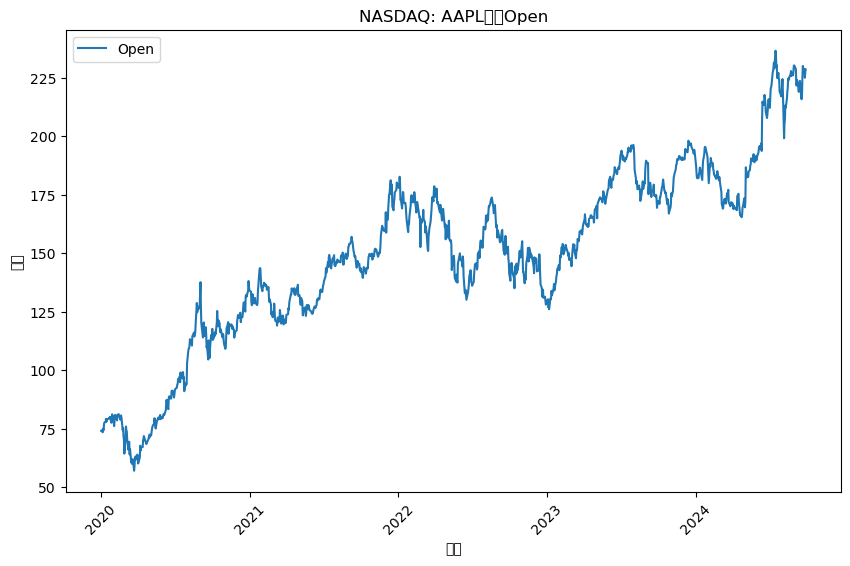

c:\Users\miche\anaconda3\envs\gpu_env\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 27599 (\N{CJK UNIFIED IDEOGRAPH-6BCF}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\miche\anaconda3\envs\gpu_env\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 26085 (\N{CJK UNIFIED IDEOGRAPH-65E5}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\miche\anaconda3\envs\gpu_env\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 26399 (\N{CJK UNIFIED IDEOGRAPH-671F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\miche\anaconda3\envs\gpu_env\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 20729 (\N{CJK UNIFIED IDEOGRAPH-50F9}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\miche\anaconda3\envs\gpu_env\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 26684 (\N{CJK UNIFIED IDEOGRAPH-6

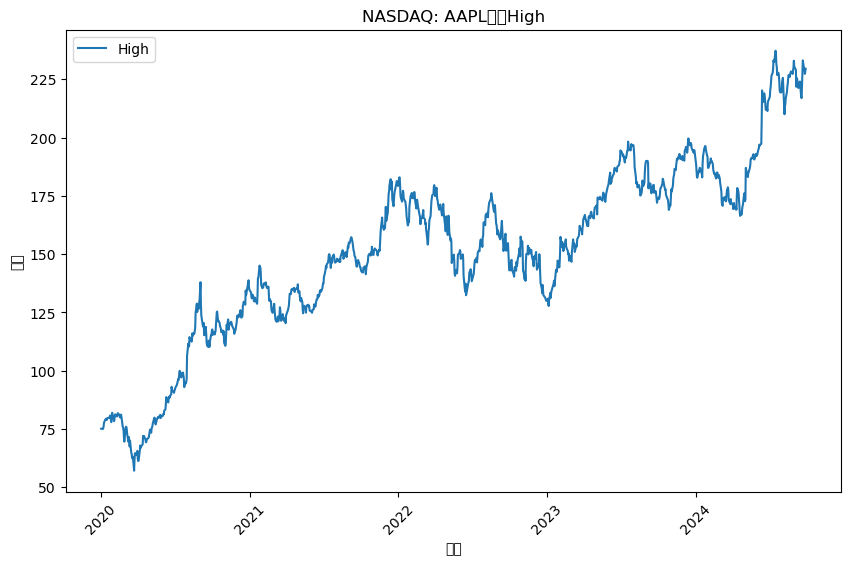

c:\Users\miche\anaconda3\envs\gpu_env\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 27599 (\N{CJK UNIFIED IDEOGRAPH-6BCF}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\miche\anaconda3\envs\gpu_env\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 26085 (\N{CJK UNIFIED IDEOGRAPH-65E5}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\miche\anaconda3\envs\gpu_env\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 26399 (\N{CJK UNIFIED IDEOGRAPH-671F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\miche\anaconda3\envs\gpu_env\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 20729 (\N{CJK UNIFIED IDEOGRAPH-50F9}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\miche\anaconda3\envs\gpu_env\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 26684 (\N{CJK UNIFIED IDEOGRAPH-6

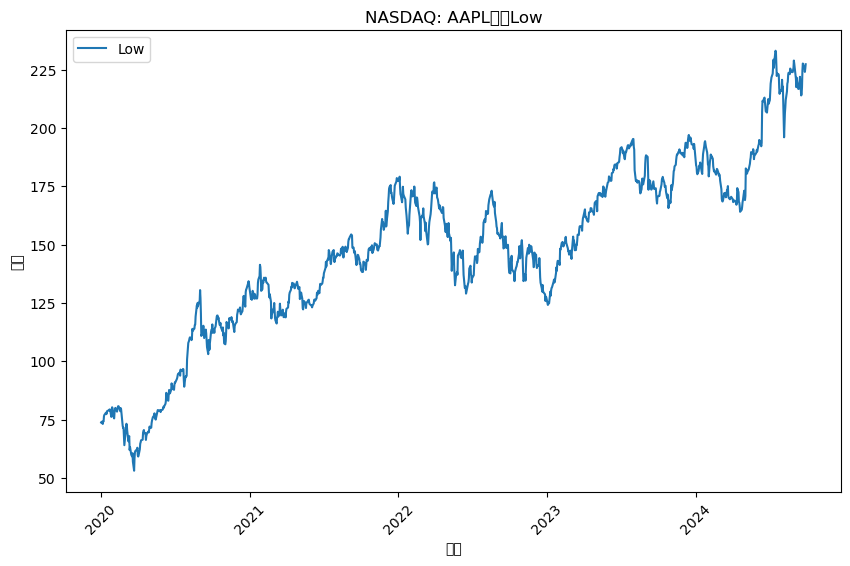

c:\Users\miche\anaconda3\envs\gpu_env\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 27599 (\N{CJK UNIFIED IDEOGRAPH-6BCF}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\miche\anaconda3\envs\gpu_env\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 26085 (\N{CJK UNIFIED IDEOGRAPH-65E5}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\miche\anaconda3\envs\gpu_env\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 26399 (\N{CJK UNIFIED IDEOGRAPH-671F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\miche\anaconda3\envs\gpu_env\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 20729 (\N{CJK UNIFIED IDEOGRAPH-50F9}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\miche\anaconda3\envs\gpu_env\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 26684 (\N{CJK UNIFIED IDEOGRAPH-6

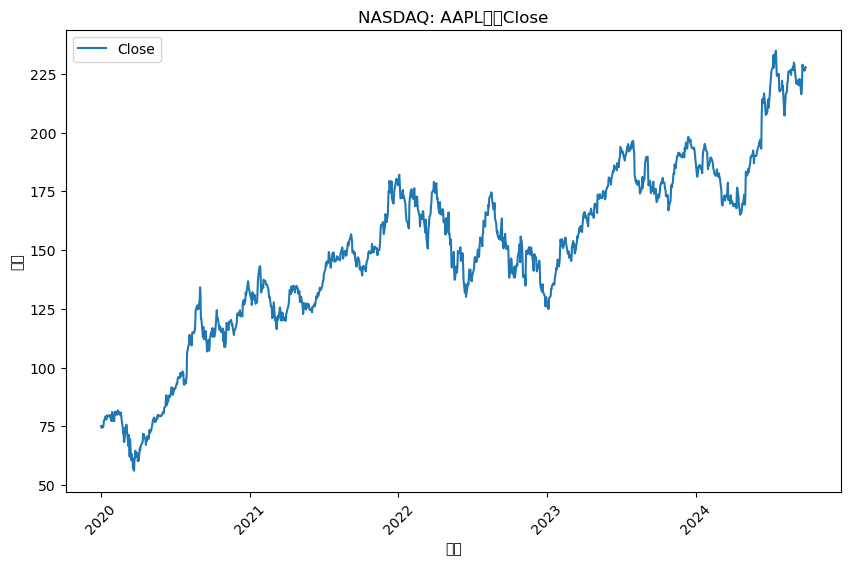

In [11]:
# 繪製收盤價圖表
plt.figure(figsize=(10, 6))
# 使用定義的函數繪製各個欄位
plot_stock_data(df_yahoo, 'Open', 'Open', 'NASDAQ: AAPL')
plot_stock_data(df_yahoo, 'High', 'High', 'NASDAQ: AAPL')
plot_stock_data(df_yahoo, 'Low', 'Low', 'NASDAQ: AAPL')
plot_stock_data(df_yahoo, 'Close', 'Close', 'NASDAQ: AAPL')

# **Machine Learning(LSTM)**

In [12]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import numpy as np
from tensorflow.keras.callbacks import EarlyStopping

Open      1.000000
High      0.998338
Low       0.998106
Close     0.996738
Volume    0.247193
Name: Open, dtype: float64


Close     1.000000
Low       0.998548
High      0.998256
Open      0.996738
Volume    0.245197
Name: Close, dtype: float64


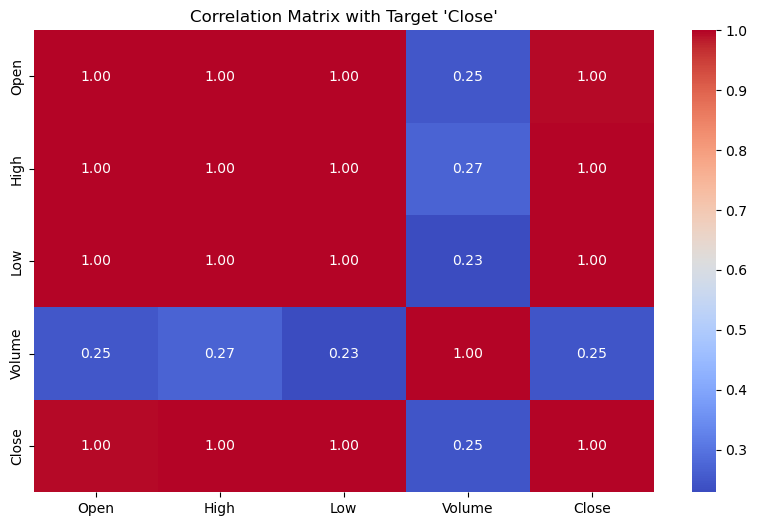

In [13]:
# 計算相關性矩陣
corr_matrix = df[['Open','High', 'Low', 'Volume', 'Close']].corr()

# 顯示與目標之間的相關性
print(corr_matrix['Open'].sort_values(ascending=False))
print("\n")
print(corr_matrix['Close'].sort_values(ascending=False))

# 繪製相關性圖
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", cbar=True, linewidths=0)
plt.title("Correlation Matrix with Target 'Close'")
plt.grid(False)
plt.show()


Price
Open      1.000000
High      0.999238
Low       0.999238
Close     0.998291
Volume   -0.628374
Name: Open, dtype: float64


Price
Close     1.000000
High      0.999228
Low       0.999222
Open      0.998291
Volume   -0.629403
Name: Close, dtype: float64


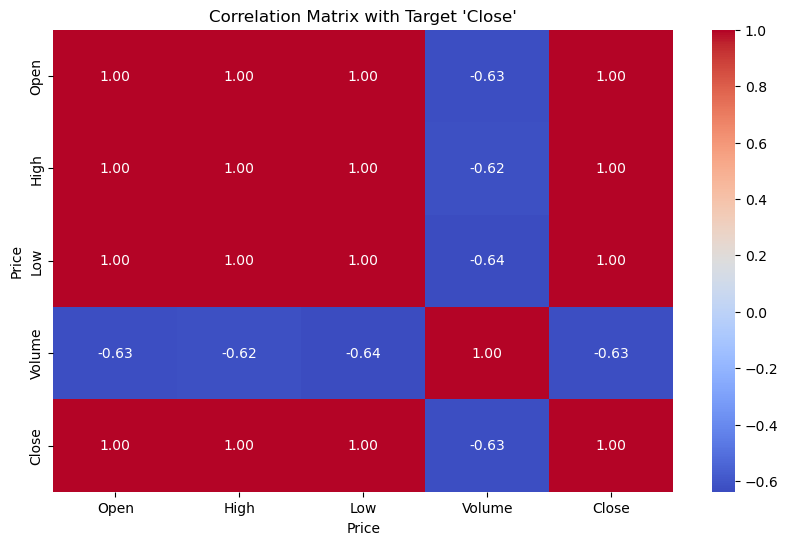

In [14]:
df_yahoo.columns = df_yahoo.columns.get_level_values(0)

# 計算相關性矩陣
corr_matrix = df_yahoo[['Open','High', 'Low', 'Volume', 'Close']].corr()

# 顯示與目標之間的相關性
print(corr_matrix['Open'].sort_values(ascending=False))
print("\n")
print(corr_matrix['Close'].sort_values(ascending=False))

# 繪製相關性圖
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", cbar=True, linewidths=0)
plt.title("Correlation Matrix with Target 'Close'")
plt.grid(False)
plt.show()


In [15]:
def mean_absolute_percentage_error(y_true, y_pred):
    """計算 MAPE（平均絕對百分比誤差）"""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [16]:
def evaluate_model_performance(model, X_train, y_train, X_test, y_test):
    # 訓練集評估
    y_train_pred = model.predict(X_train)
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    train_mape = mean_absolute_percentage_error(y_train, y_train_pred)
    train_r2 = r2_score(y_train, y_train_pred)

    # 測試集評估
    y_test_pred = model.predict(X_test)
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    test_mape = mean_absolute_percentage_error(y_test, y_test_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    print(f"Training MSE: {train_mse}, Test MSE: {test_mse}")
    print(f"Training MAE: {train_mae}, Test MAE: {test_mae}")
    print(f"Training MAPE: {train_mape}%, Test MAPE: {test_mape}%")
    print(f"Training R²: {train_r2}, Test R²: {test_r2}")

    return train_mse, test_mse, train_mae, test_mae, train_mape, test_mape, train_r2, test_r2

In [17]:
# 評估模型表現
def evaluate_and_store_results(model_name, model, X_train_scaled, y_train, X_test_scaled, y_test, results, key_prefix):
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    # 評估模型表現
    train_mse, test_mse, train_mae, test_mae, train_mape, test_mape, train_r2, test_r2 = evaluate_model_performance(
        model, X_train_scaled, y_train, X_test_scaled, y_test)

    # 將結果存入字典
    results[model_name] = {
        f'Train_MSE_{key_prefix}': train_mse,
        f'Test_MSE_{key_prefix}': test_mse,
        f'Train_MAE_{key_prefix}': train_mae,
        f'Test_MAE_{key_prefix}': test_mae,
        f'Train_MAPE_{key_prefix}': train_mape,
        f'Test_MAPE_{key_prefix}': test_mape,
        f'Train_R2_{key_prefix}': train_r2,
        f'Test_R2_{key_prefix}': test_r2,
        f'y_pred_{key_prefix}': y_pred
    }

In [18]:
def create_dataset(dataset, look_back=10):
  X, Y = [], []
  for i in range(len(dataset) - look_back):
    X.append(dataset[i:i + look_back, 0])
    Y.append(dataset[i + look_back, 0])
  return np.array(X), np.array(Y)

def build_lstm_model(shape):
    model = Sequential()
    model.add(LSTM(256, return_sequences=True, input_shape=shape))
    model.add(Dropout(0.2))
    model.add(LSTM(256, return_sequences=True, input_shape=shape))
    model.add(Dropout(0.2))
    model.add(LSTM(256))
    model.add(Dropout(0.2))
    model.add(Dense(128))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# 設置 EarlyStopping 回調函數
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [19]:
def plot_stock_prediction(df, train_data, test_data, predicted_data, feature='Close'):
    # 訓練資料索引
    train_index = train_data.index
    # 測試資料索引
    test_index = test_data.index

    plt.figure(figsize=(12, 6))
    plt.plot(df.loc[train_index, 'Date'], df.loc[train_index, feature], label='Training Data (True Price)', color='blue')
    plt.plot(df.loc[test_index, 'Date'], df.loc[test_index, feature], label='Test Data (True Price)', color='orange')
    plt.plot(df.loc[test_index, 'Date'][len(df.loc[test_index, 'Date']) - len(predicted_data):], predicted_data, label='Predicted Price', color='green')
    plt.title(f'{feature} Stock Price Prediction')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()


In [20]:
def train_and_predict_stock(df, look_back=10):
    # 移除缺失值
    df = df.dropna()

    # 新增時間特徵
    df['Year'] = df['Date'].dt.year
    df['Month'] = df['Date'].dt.month
    df['Weekday'] = df['Date'].dt.weekday

    # 去除 'Open' 和 'Close' 欄位的特徵
    features = ['High', 'Low', 'Volume', 'Year', 'Month', 'Weekday']

    train_size = int(len(df) * 0.8)
    train_data = df[:train_size]
    test_data = df[train_size:]

    # 特徵標準化（分別對訓練集和測試集進行標準化）
    scaler_features = StandardScaler()
    scaled_train_features = scaler_features.fit_transform(train_data[features])
    scaled_test_features = scaler_features.transform(test_data[features])

    # 開盤價和收盤價標準化
    scaler_open = StandardScaler()
    scaler_close = StandardScaler()

    y_train_open_scaled = scaler_open.fit_transform(train_data[['Open']])
    y_test_open_scaled = scaler_open.transform(test_data[['Open']])

    y_train_close_scaled = scaler_close.fit_transform(train_data[['Close']])
    y_test_close_scaled = scaler_close.transform(test_data[['Close']])

    # 準備 LSTM 模型所需的資料
    X_train_open, y_train_open_scaled = create_dataset(y_train_open_scaled, look_back)
    X_test_open, y_test_open_scaled = create_dataset(y_test_open_scaled, look_back)

    X_train_close, y_train_close_scaled = create_dataset(y_train_close_scaled, look_back)
    X_test_close, y_test_close_scaled = create_dataset(y_test_close_scaled, look_back)

    # 重塑數據以符合 LSTM 輸入格式
    X_train_open = np.reshape(X_train_open, (X_train_open.shape[0], X_train_open.shape[1], 1))
    X_train_close = np.reshape(X_train_close, (X_train_close.shape[0], X_train_close.shape[1], 1))
    X_test_open = np.reshape(X_test_open, (X_test_open.shape[0], X_test_open.shape[1], 1))
    X_test_close = np.reshape(X_test_close, (X_test_close.shape[0], X_test_close.shape[1], 1))

    results={}

    # 訓練和預測每個模型
    print("---- 開盤價預測 ----")
    model_open = build_lstm_model((look_back, 1))
    model_open.fit(X_train_open, y_train_open_scaled, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

    # 訓練和預測每個模型
    print("---- 收盤價預測 ----")
    model_close = build_lstm_model((look_back, 1))
    model_close.fit(X_train_close, y_train_close_scaled, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

    # 預測開盤價和收盤價
    predicted_open = model_open.predict(X_test_open).reshape(-1, 1)
    predicted_close = model_close.predict(X_test_close).reshape(-1, 1)

    # 反標準化並將結果展平
    predicted_open = scaler_open.inverse_transform(predicted_open).flatten()
    predicted_close = scaler_close.inverse_transform(predicted_close).flatten()

    #評估模型表現
    evaluate_and_store_results("LSTM_Open", model_open, X_train_open, y_train_open_scaled, X_test_open, y_test_open_scaled, results, "Open")
    evaluate_and_store_results("LSTM_Close", model_close, X_train_close, y_train_close_scaled, X_test_close, y_test_close_scaled, results, "Close")

    # 顯示開盤價預測結果
    plot_stock_prediction(df, train_data, test_data, predicted_open, feature='Open')

    # 顯示收盤價預測結果
    plot_stock_prediction(df, train_data, test_data, predicted_close, feature='Close')

    return {
        'predicted_open': predicted_open,
        'predicted_close': predicted_close,
        'evaluation_results': results
    }

c:\Users\miche\anaconda3\envs\gpu_env\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\Users\miche\anaconda3\envs\gpu_env\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
c:\Users\miche\anaconda3\envs\gpu_env\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

---- 開盤價預測 ----
Epoch 1/100
23/23 [==============================] - 7s 52ms/step - loss: 0.0805 - val_loss: 0.1610
Epoch 2/100
23/23 [==============================] - 0s 11ms/step - loss: 0.0371 - val_loss: 0.2851
Epoch 3/100
23/23 [==============================] - 0s 9ms/step - loss: 0.0288 - val_loss: 0.1857
Epoch 4/100
23/23 [==============================] - 0s 8ms/step - loss: 0.0264 - val_loss: 0.3133
Epoch 5/100
23/23 [==============================] - 0s 9ms/step - loss: 0.0259 - val_loss: 0.1092
Epoch 6/100
23/23 [==============================] - 0s 9ms/step - loss: 0.0224 - val_loss: 0.1530
Epoch 7/100
23/23 [==============================] - 0s 9ms/step - loss: 0.0195 - val_loss: 0.1776
Epoch 8/100
23/23 [==============================] - 0s 9ms/step - loss: 0.0237 - val_loss: 0.1003
Epoch 9/100
23/23 [==============================] - 0s 9ms/step - loss: 0.0219 - val_loss: 0.1267
Epoch 10/100
23/23 [==============================] - 0s 9ms/step - loss: 0.0177 - val_loss

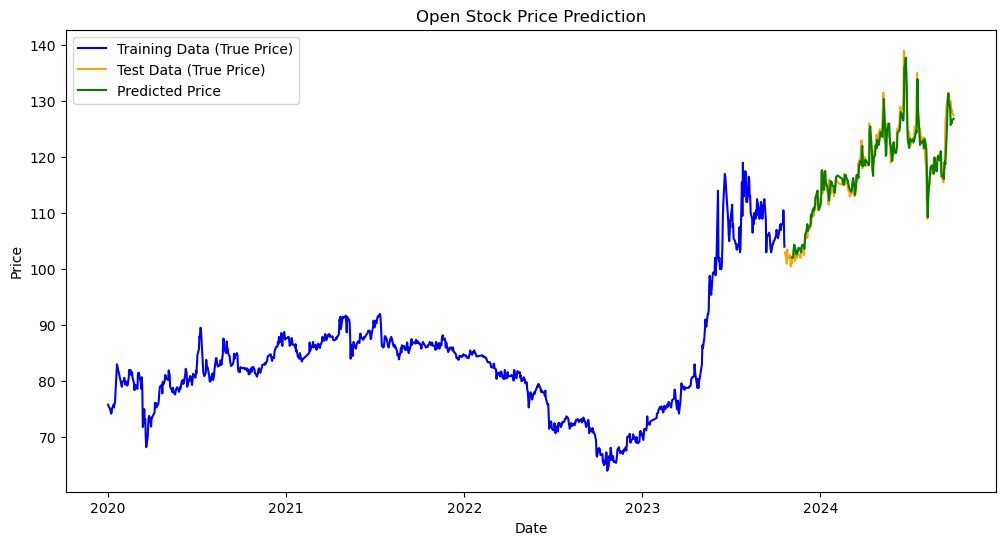

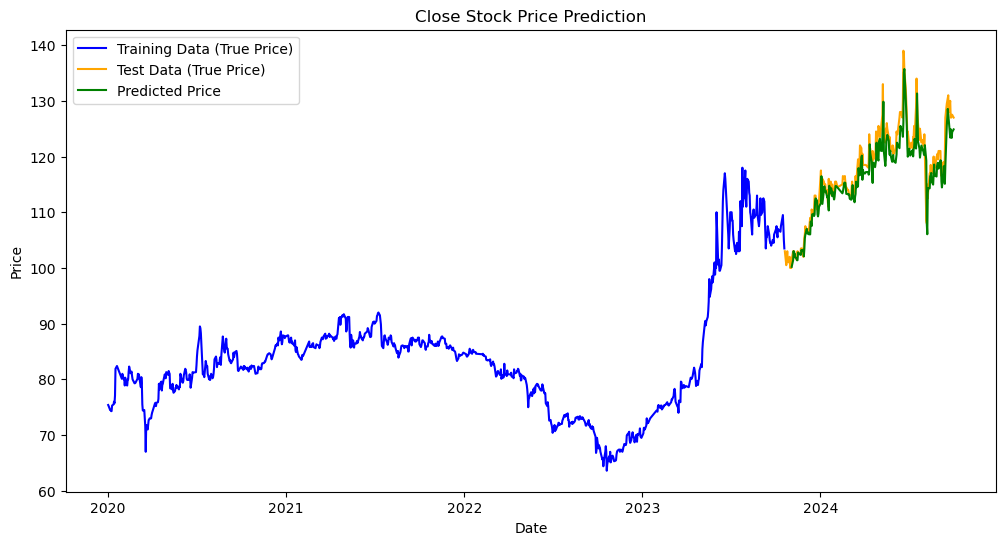

In [21]:
result = train_and_predict_stock(df)

---- 開盤價預測 ----
Epoch 1/100
24/24 [==============================] - 6s 63ms/step - loss: 0.1480 - val_loss: 0.0245
Epoch 2/100
24/24 [==============================] - 0s 10ms/step - loss: 0.0441 - val_loss: 0.0402
Epoch 3/100
24/24 [==============================] - 0s 9ms/step - loss: 0.0392 - val_loss: 0.0191
Epoch 4/100
24/24 [==============================] - 0s 9ms/step - loss: 0.0359 - val_loss: 0.0205
Epoch 5/100
24/24 [==============================] - 0s 9ms/step - loss: 0.0312 - val_loss: 0.0337
Epoch 6/100
24/24 [==============================] - 0s 9ms/step - loss: 0.0309 - val_loss: 0.0168
Epoch 7/100
24/24 [==============================] - 0s 9ms/step - loss: 0.0327 - val_loss: 0.0225
Epoch 8/100
24/24 [==============================] - 0s 10ms/step - loss: 0.0263 - val_loss: 0.0209
Epoch 9/100
24/24 [==============================] - 0s 9ms/step - loss: 0.0266 - val_loss: 0.0246
Epoch 10/100
24/24 [==============================] - 0s 9ms/step - loss: 0.0261 - val_los

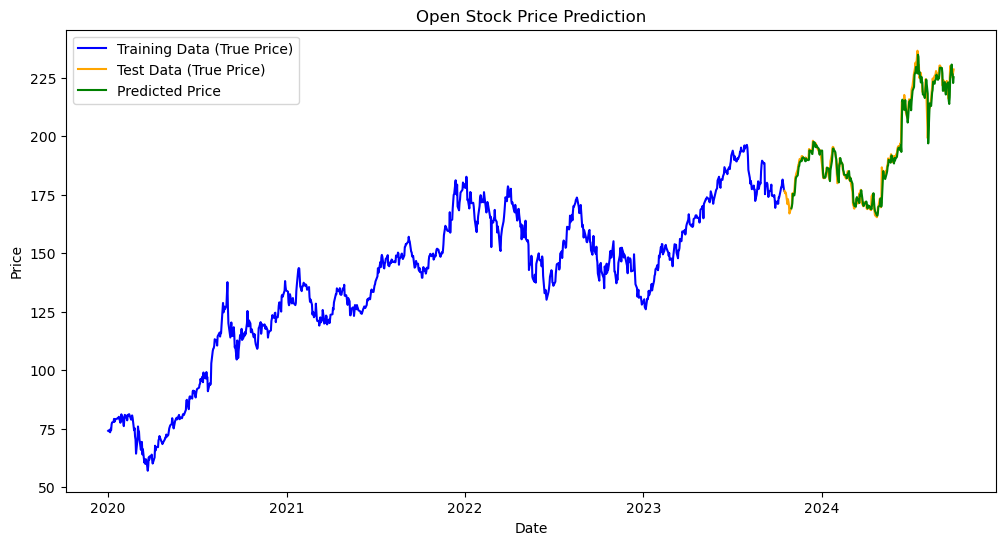

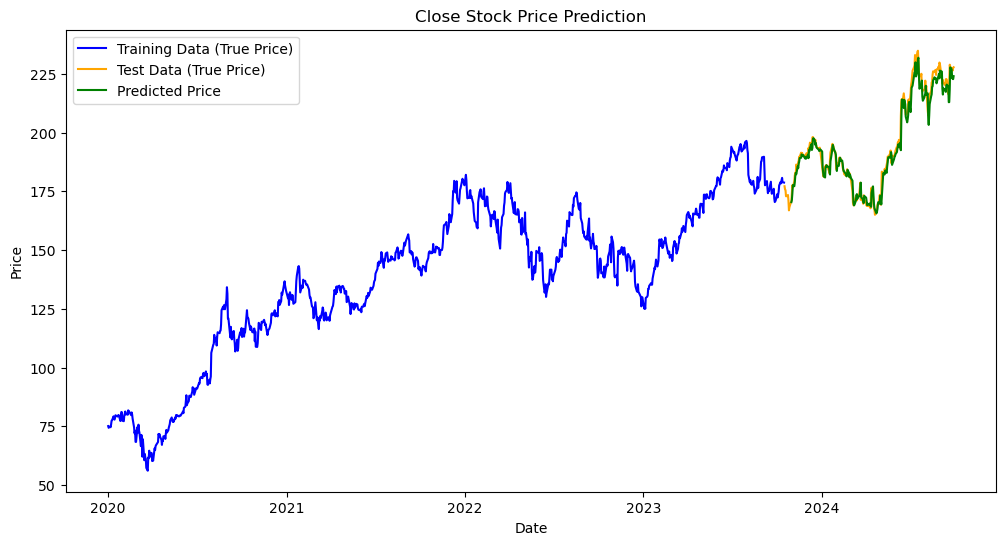

In [22]:
result_yahoo = train_and_predict_stock(df_yahoo)

# **K 線趨勢分類模型（CNN）**

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.metrics import classification_report, confusion_matrix
import mplfinance as mpf
import os

In [24]:
# 定義技術指標計算函數
def calculate_technical_indicators(df):

    # 計算簡單移動平均線(SMA)
    df['SMA_20'] = df['Close'].rolling(window=20).mean()

    # 計算相對強弱指標(RSI)
    def calculate_RSI(data, window=14):
        delta = data.diff(1)
        gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
        loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
        RS = gain / loss
        return 100 - (100 / (1 + RS))

    df['RSI_14'] = calculate_RSI(df['Close'], window=14)

    # 計算MACD
    df['EMA_12'] = df['Close'].ewm(span=12, adjust=False).mean()
    df['EMA_26'] = df['Close'].ewm(span=26, adjust=False).mean()
    df['MACD'] = df['EMA_12'] - df['EMA_26']
    df['Signal_Line'] = df['MACD'].ewm(span=9, adjust=False).mean()

    return df

# 假設 df 是你的股票資料 DataFrame
df = calculate_technical_indicators(df)

# 顯示包含技術指標的數據
print(df[['SMA_20', 'RSI_14', 'MACD', 'Signal_Line']])

       SMA_20     RSI_14      MACD  Signal_Line
0         NaN        NaN  0.000000     0.000000
1         NaN        NaN -0.015954    -0.003191
2         NaN        NaN -0.084113    -0.019375
3         NaN        NaN -0.136555    -0.042811
4         NaN        NaN -0.192040    -0.072657
...       ...        ...       ...          ...
1149  122.525  59.375000  2.555539     1.578535
1150  122.875  67.857143  2.471274     1.757083
1151  123.225  69.642857  2.416978     1.889062
1152  123.625  67.307692  2.346894     1.980628
1153  123.925  65.384615  2.225354     2.029573

[1154 rows x 4 columns]


In [25]:
# 假設 df 是你的股票資料 DataFrame
df_yahoo = calculate_technical_indicators(df_yahoo)

# 顯示包含技術指標的數據
print(df_yahoo[['SMA_20', 'RSI_14', 'MACD', 'Signal_Line']])

Price      SMA_20     RSI_14      MACD  Signal_Line
0             NaN        NaN  0.000000     0.000000
1             NaN        NaN -0.058234    -0.011647
2             NaN        NaN -0.055930    -0.020503
3             NaN        NaN -0.081607    -0.032724
4             NaN        NaN -0.005068    -0.027193
...           ...        ...       ...          ...
1188   223.680001  56.174900  0.730428     0.305406
1189   223.689501  61.264678  0.973629     0.439051
1190   223.606501  57.022165  1.073304     0.565901
1191   223.658001  61.964287  1.230904     0.698902
1192   223.558001  62.207231  1.361890     0.831499

[1193 rows x 4 columns]


In [26]:
# 定義標記資料的函數
def label_data(df):
    # 初始化標記欄位
    df['Label'] = 0  # 預設標記為「跌」

    # 計數器，用來計算符合「漲」條件的指標個數
    df['count_up'] = 0  # 計算符合「漲」條件的指標

    # 條件 1：SMA 趨勢判斷
    df.loc[df['Close'] > df['SMA_20'], 'count_up'] += 1  # 當前價格高於 SMA，視為「漲」

    # 條件 2：RSI 超買/超賣判斷
    df.loc[df['RSI_14'] < 30, 'count_up'] += 1  # RSI 低於 30，視為「漲」
    df.loc[df['RSI_14'] > 70, 'count_up'] -= 1  # RSI 超過 70，視為「跌」

    # 條件 3：MACD 趨勢判斷
    df.loc[df['MACD'] > df['Signal_Line'], 'count_up'] += 1  # MACD 線在 Signal 線之上，視為「漲」
    df.loc[df['MACD'] < df['Signal_Line'], 'count_up'] -= 1  # MACD 線在 Signal 線之下，視為「跌」

    # 確定最終標記
    df['Label'] = df['count_up'].apply(lambda x: 1 if x > 0 else 0)  # 如果計數結果大於 0，標記為「漲」，否則為「跌」

    # 移除計數欄位以清潔資料
    df.drop(columns=['count_up'], inplace=True)

    return df

df = label_data(df)  # 標記資料

# 顯示標記後的數據
print(df[['Close', 'SMA_20', 'RSI_14', 'MACD', 'Signal_Line', 'Label']])

      Close   SMA_20     RSI_14      MACD  Signal_Line  Label
0      75.4      NaN        NaN  0.000000     0.000000      0
1      75.2      NaN        NaN -0.015954    -0.003191      0
2      74.5      NaN        NaN -0.084113    -0.019375      0
3      74.5      NaN        NaN -0.136555    -0.042811      0
4      74.3      NaN        NaN -0.192040    -0.072657      0
...     ...      ...        ...       ...          ...    ...
1149  127.0  122.525  59.375000  2.555539     1.578535      1
1150  127.0  122.875  67.857143  2.471274     1.757083      1
1151  127.5  123.225  69.642857  2.416978     1.889062      1
1152  127.5  123.625  67.307692  2.346894     1.980628      1
1153  127.0  123.925  65.384615  2.225354     2.029573      1

[1154 rows x 6 columns]


In [27]:
df_yahoo = label_data(df_yahoo)  # 標記資料

# 顯示標記後的數據
print(df_yahoo[['Close', 'SMA_20', 'RSI_14', 'MACD', 'Signal_Line', 'Label']])

Price       Close      SMA_20     RSI_14      MACD  Signal_Line  Label
0       75.087502         NaN        NaN  0.000000     0.000000      0
1       74.357498         NaN        NaN -0.058234    -0.011647      0
2       74.949997         NaN        NaN -0.055930    -0.020503      0
3       74.597504         NaN        NaN -0.081607    -0.032724      0
4       75.797501         NaN        NaN -0.005068    -0.027193      1
...           ...         ...        ...       ...          ...    ...
1188   226.470001  223.680001  56.174900  0.730428     0.305406      1
1189   227.369995  223.689501  61.264678  0.973629     0.439051      1
1190   226.369995  223.606501  57.022165  1.073304     0.565901      1
1191   227.520004  223.658001  61.964287  1.230904     0.698902      1
1192   227.789993  223.558001  62.207231  1.361890     0.831499      1

[1193 rows x 6 columns]


In [28]:
# 保存 K 線圖的函數
def save_kline_images(df, save_dir):
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)

    labels = []
    for i in range(len(df) - 10):
        sample_df = df.iloc[i:i + 10].copy()
        sample_df['Date'] = pd.to_datetime(sample_df.index)  # 將索引轉換為日期格式
        sample_df.set_index('Date', inplace=True)
        save_path = os.path.join(save_dir, f'kline_{i+10}.png')
        mpf.plot(sample_df, type='candle', style='yahoo', savefig=save_path)
        labels.append(df.iloc[i+10]['Label'])

    return labels
labels_df = save_kline_images(df, 'kline_images')

In [29]:
labels_yahoo = save_kline_images(df_yahoo, 'kline_yahoo_images')

In [30]:
def create_cnn_model(input_shape):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(2, activation='softmax')  # 二分類：上漲或下跌
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [31]:
def load_images_and_labels(image_dir, labels=None, image_size=(64, 64)):
    images = []
    for i, label in enumerate(labels):
        img_path = f"{image_dir}/kline_{i+10}.png"
        img = load_img(img_path, target_size=image_size, color_mode='rgb')
        img_array = img_to_array(img) / 255.0  # 正規化
        images.append(img_array)

    X = np.array(images)
    y = to_categorical(np.array(labels))  # 將標籤轉為分類格式
    return X, y

# 加載圖片和標籤
X_df, y_df = load_images_and_labels('kline_images',labels=labels_df)

In [32]:
X_yahoo, y_yahoo = load_images_and_labels('kline_yahoo_images', labels=labels_yahoo)

In [33]:
# 切分訓練集和測試集
X_train_df, X_test_df, y_train_df, y_test_df = train_test_split(X_df, y_df, test_size=0.2, random_state=42)

# 創建並訓練模型
input_shape = (64, 64, 3)
model_df = create_cnn_model(input_shape)
model_df.fit(X_train_df, y_train_df, epochs=10, batch_size=32, validation_data=(X_test_df, y_test_df))

Epoch 1/10
29/29 [==============================] - 2s 13ms/step - loss: 0.5842 - accuracy: 0.6951 - val_loss: 0.4101 - val_accuracy: 0.8384
Epoch 2/10
29/29 [==============================] - 0s 5ms/step - loss: 0.4703 - accuracy: 0.7923 - val_loss: 0.3442 - val_accuracy: 0.8734
Epoch 3/10
29/29 [==============================] - 0s 5ms/step - loss: 0.4272 - accuracy: 0.8153 - val_loss: 0.3575 - val_accuracy: 0.8777
Epoch 4/10
29/29 [==============================] - 0s 5ms/step - loss: 0.3974 - accuracy: 0.8131 - val_loss: 0.3308 - val_accuracy: 0.8865
Epoch 5/10
29/29 [==============================] - 0s 5ms/step - loss: 0.3656 - accuracy: 0.8459 - val_loss: 0.3039 - val_accuracy: 0.8865
Epoch 6/10
29/29 [==============================] - 0s 5ms/step - loss: 0.3532 - accuracy: 0.8459 - val_loss: 0.3237 - val_accuracy: 0.8821
Epoch 7/10
29/29 [==============================] - 0s 5ms/step - loss: 0.3034 - accuracy: 0.8710 - val_loss: 0.3070 - val_accuracy: 0.8734
Epoch 8/10
29/29 [=

In [34]:
# 切分訓練集和測試集
X_train_yahoo, X_test_yahoo, y_train_yahoo, y_test_yahoo = train_test_split(X_yahoo, y_yahoo, test_size=0.2, random_state=42)

# 創建並訓練模型
model_yahoo = create_cnn_model(input_shape)
model_yahoo.fit(X_train_yahoo, y_train_yahoo, epochs=10, batch_size=32, validation_data=(X_test_yahoo, y_test_yahoo))

Epoch 1/10
30/30 [==============================] - 1s 13ms/step - loss: 0.7045 - accuracy: 0.5634 - val_loss: 0.6608 - val_accuracy: 0.4979
Epoch 2/10
30/30 [==============================] - 0s 5ms/step - loss: 0.5065 - accuracy: 0.7801 - val_loss: 0.4255 - val_accuracy: 0.8186
Epoch 3/10
30/30 [==============================] - 0s 5ms/step - loss: 0.4552 - accuracy: 0.8097 - val_loss: 0.4577 - val_accuracy: 0.8270
Epoch 4/10
30/30 [==============================] - 0s 5ms/step - loss: 0.4110 - accuracy: 0.8256 - val_loss: 0.3858 - val_accuracy: 0.8354
Epoch 5/10
30/30 [==============================] - 0s 5ms/step - loss: 0.3866 - accuracy: 0.8393 - val_loss: 0.3774 - val_accuracy: 0.8439
Epoch 6/10
30/30 [==============================] - 0s 5ms/step - loss: 0.3833 - accuracy: 0.8425 - val_loss: 0.3703 - val_accuracy: 0.8270
Epoch 7/10
30/30 [==============================] - 0s 5ms/step - loss: 0.3531 - accuracy: 0.8552 - val_loss: 0.3625 - val_accuracy: 0.8228
Epoch 8/10
30/30 [=

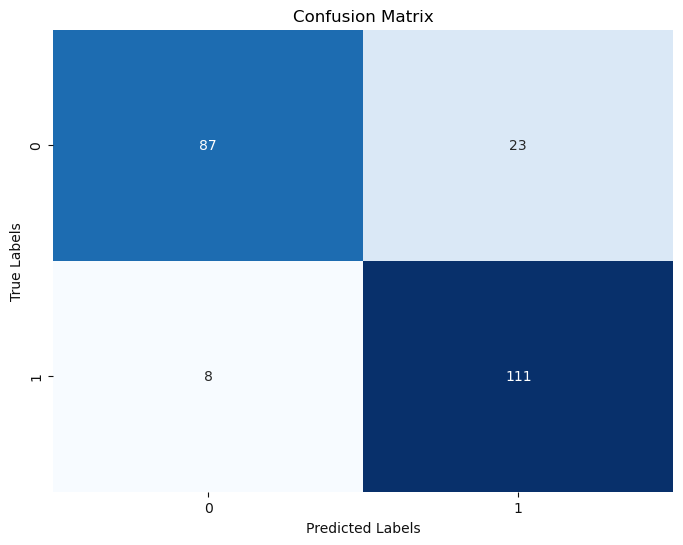

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.79      0.85       110
           1       0.83      0.93      0.88       119

    accuracy                           0.86       229
   macro avg       0.87      0.86      0.86       229
weighted avg       0.87      0.86      0.86       229



In [35]:
y_pred_prob_df = model_df.predict(X_test_df) 
y_pred_classes_df = np.argmax(y_pred_prob_df, axis=1)

# 將 y_test_df 從 one-hot 編碼轉為單一標籤格式
y_test_df_single_label = np.argmax(y_test_df, axis=1)

# 計算混淆矩陣
conf_matrix_df = confusion_matrix(y_test_df_single_label, y_pred_classes_df)

# 繪製混淆矩陣
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_df, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

# 顯示分類報告
print("Classification Report:")
print(classification_report(y_test_df_single_label, y_pred_classes_df))


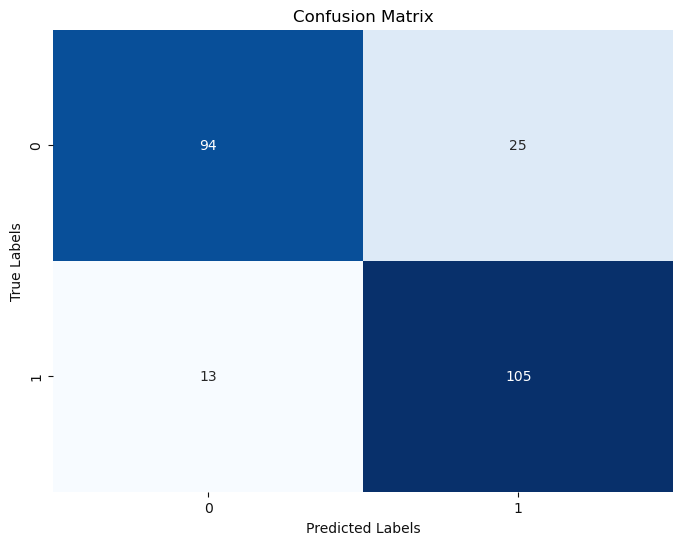

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.79      0.83       119
           1       0.81      0.89      0.85       118

    accuracy                           0.84       237
   macro avg       0.84      0.84      0.84       237
weighted avg       0.84      0.84      0.84       237



In [36]:
y_pred_prob_yahoo = model_yahoo.predict(X_test_yahoo) 
y_pred_classes_yahoo = np.argmax(y_pred_prob_yahoo, axis=1)

# 將 y_test_yahoo 從 one-hot 編碼轉為單一標籤格式
y_test_yahoo_single_label = np.argmax(y_test_yahoo, axis=1)

# 計算混淆矩陣
conf_matrix_yahoo = confusion_matrix(y_test_yahoo_single_label, y_pred_classes_yahoo)

# 繪製混淆矩陣
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_yahoo, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

# 顯示分類報告
print("Classification Report:")
print(classification_report(y_test_yahoo_single_label, y_pred_classes_yahoo))
